# Linear abosrption and circular dischroism for larger aggregates in specific Geometries: Helix and Creeper

## 0.Overview

We are going to extend the discussion from the simple dimer system to aggregates consisting of many molecules. For the generalization of the theoretical framework to study larger systems, we introduce two seemingly different theoretical approaches:
* The Oscillating Dipole Approach (ODA);
* The Polarizable Object Approach (POA).

They remain equivalent when applied to aggregates of multiple molecule systems.


## 1.Generalization from Dimer to N-Molecule Systems

In the dimer model, we consider a $2×2$ Hamiltonian that describes the coupling between the excited states of two molecules; When moving to an aggregate of N molecules, the system is described by an $N×N$ Hamiltonian.

Each basis state in this Hamiltonian corresponds to one molecule being excited (while all others are in the ground state). The diagonal elements of this Hamiltonian are all equal to the unperturbed single-molecule excitation energy $ℏω_0$, and the off-diagonal elements are given by the dipole-dipole coupling terms, typically expressed as $V_{ij}=μ_0^2 G_{ij}$

Diagonalizing this Hamiltonian yields N exciton eigenstates with corresponding energies, which in turn determine the positions of the absorption peaks.


## 2.The Oscillating Dipole Approach (POA) Approach for Larger Aggregates

In the POA, each molecule's induced dipole is affected not only by the external electric field but also by the fields generated by all the other molecules in the aggregate.

This leads to a set of N coupled linear equations, where the induced dipole $μ_i(ω)$ on molecule $i$ depends on the sum of the fields from all other molecules weighted by the geometrical factors $G_{ij}$.

Solving these equations provides the total induced dipole moment of the aggregate, which is then used to calculate the absorption spectrum.

For the circular dichroism (CD), the response to left- and right-circularly polarized light is computed separately. When the first-order correction in the expansion of $e^{i\vec{k}·\vec{r}}$ is included, the differences in these responses yield a nonzero CD signal.


## 3.The Oscillating Dipole Approach (ODA) Approach for Larger Aggregates

In the ODA, one constructs the exciton Hamiltonian based on the direct product of the individual molecular states.

After diagonalizing the Hamiltonian, each exciton state is expressed as a linear combination of the basis states, and its transition dipole moment is computed as the corresponding weighted sum of the individual molecular dipole moments.

Additionally, the CD spectrum is calculated by assigning a rotational strength to each exciton state, which depends on the interplay between the electric and magnetic dipole transitions. The CD spectrum is typically expressed as a sum over exciton states:
$$ Δε(ω)∝\sum_k R_k L(ω;ω_k,γ) $$

Where $R_k$ is the rotational strength and $L(ω;ω_k,γ)$ is a Lorentzian distribution function.


## 4.Helix and Creeper geometries

### Helix geometry

* In this configuration, the molecules are arranged along a helical path. The centers of the molecules are aligned along the z-axis with a fixed spacing (e.g., 7 Å), and each molecule is rotated by a fixed angle (e.g., 30°) relative to the previous one.

* In this geometry, the coupling parameter G is consistently positive, leading to a blue shift in the absorption spectrum (characteristic of H-aggregates). The CD spectrum in this case shows a particular sign distribution, with the longer-wavelength feature (Cotton effect) being positive.

### Creeper geometry

* Here, the molecules have a smaller spacing along the z-axis (e.g., 5 Å) and are also laterally shifted in the xy-plane, resulting in a structure that wraps around a cylindrical surface.

* The different spatial arrangement can lead to a negative effective coupling (negative G), which produces a red shift in the absorption spectrum (typical of J-aggregates). In the creeper geometry, the CD couplet’s sign is reversed compared to the helix geometry.

Despite both geometries being composed of right-handed aggregates, the details of molecular arrangement significantly influence the spectral characteristics. This highlights the sensitivity of supramolecular chirality to the precise geometric configuration.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lorentzian(x, x0, γ):
    """
    (eqn.5) Calculate the lorentzian distribution:
        lorentzian(x, x0, γ) = γ/((x-x0)^2+γ^2)
    γ (float): half-width at half-maximum (HWHM) of the Lorentzian;
    x (array): frequency or energy axis;
    x0 (float): center of the Lorentzian peak.
    """
    return γ/((x-x0)**2+γ**2)

# Helper functions for vector operations
def normalize(v):
    """
    Return the normalized vector of v
    This is a standard helper function used to normalize a vector,
    which is useful for constructing unit vectors for dipole directions or other calculations requiring normalized vectors.
    """
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def dipole_coupling_element(e_i, e_j, r_i, r_j):
    """
    (eqn.8) Calculate the geometrical coupling factor G_ij between two molecules i and j,
    based on the dipole-dipole interaction in the point-dipole approximation:

    G_ij = (e_i·e_j - 3 (e_i·r_hat)(e_j·r_hat)) / r^3,

    where r = r_j - r_i and r_hat = r / |r|.
    """
    r_vec = r_j - r_i
    r = np.linalg.norm(r_vec)
    if r == 0:
        return 0.0
    r_hat = r_vec / r
    dot_e = np.dot(e_i, e_j)
    dot_i = np.dot(e_i, r_hat)
    dot_j = np.dot(e_j, r_hat)
    return (dot_e - 3 * dot_i * dot_j) / (r**3)

# Geometry generators for N=5 molecules
def generate_helix_geometry(N=5, dz=7.0, dtheta=30):
    """
    Generate positions and dipole orientations for a helix geometry.
    
    Molecule i:
      - Position: (0, 0, i*dz) [i=0,...,N-1] (units: Å)
      - Dipole orientation: in the xy-plane, rotated by i*dtheta (degrees)
    
    Returns:
        positions: list of 3D coordinates (numpy arrays)
        dipoles: list of unit vectors for dipole orientations (numpy arrays)
    """
    positions = []
    dipoles = []
    for i in range(N):
        # Position along z
        pos = np.array([0.0, 0.0, i * dz])
        positions.append(pos)
        # Dipole in xy plane, angle in radians
        theta = np.deg2rad(i * dtheta)
        e = np.array([np.cos(theta), np.sin(theta), 0.0])
        e = normalize(e)
        dipoles.append(e)
    return positions, dipoles

def generate_creeper_geometry(N=5, dz=5.0, dx=5.0, dtheta=30):
    """
    Generate positions and dipole orientations for a creeper geometry.
    
    For molecule i (i=0,...,N-1):
      - The z-coordinate is i*dz.
      - In the xy-plane, each molecule is shifted relative to the previous one:
            x_i = sum_{j=1}^{i} (dx * cos(j*dtheta))
            y_i = sum_{j=1}^{i} (dx * sin(j*dtheta))
      - Dipole orientation: same as in helix (in xy-plane, rotated by i*dtheta).
    
    Returns:
        positions: list of 3D coordinates (numpy arrays)
        dipoles: list of unit vectors (numpy arrays)
    """
    positions = []
    dipoles = []
    x_total = 0.0
    y_total = 0.0
    for i in range(N):
        if i > 0:
            theta = np.deg2rad(i * dtheta)
            x_total += dx * np.cos(theta)
            y_total += dx * np.sin(theta)
        pos = np.array([x_total, y_total, i * dz])
        positions.append(pos)
        theta = np.deg2rad(i * dtheta)
        e = np.array([np.cos(theta), np.sin(theta), 0.0])
        dipoles.append(normalize(e))
    return positions, dipoles


## 5.Significance and Equivalence of Methods

Both the ODA and POA methods yield identical absorption and CD spectra for larger aggregates, reinforcing the idea that they are formally equivalent when the same physical approximations are applied.

The analysis also illustrates how the macroscopic chiroptical properties of aggregates (such as the spectral shifts and the CD couplet signs) are determined by the specific spatial arrangement of the molecules, rather than by any spontaneous symmetry breaking in the condensed-matter sense.

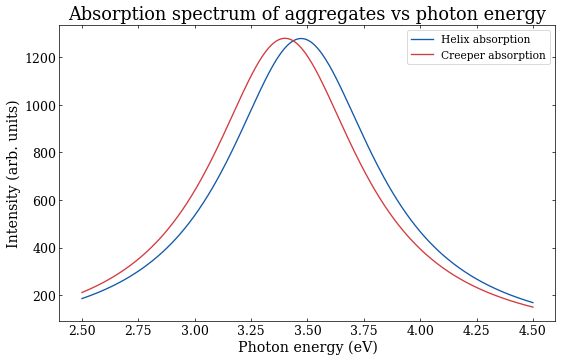

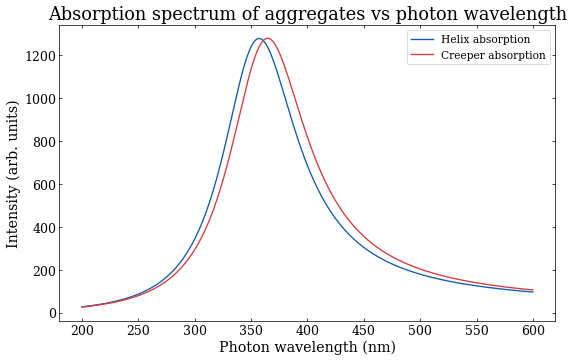

In [2]:
def construct_hamiltonian(positions, dipoles, ħω0, μ0):
    """
    (eqn.37) Construct the exciton Hamiltonian for an aggregate of molecules.
        H_{ii} = ħω0 for all i.
        H_{ij} = μ0^2 * G_{ij} for i ≠ j, where G_{ij} is computed from positions and dipoles.
    Returns:
        H: N × N array (symmetric)
    """
    N = len(positions)
    H = np.zeros((N, N))
    for i in range(N):
        H[i, i] = ħω0
        for j in range(i+1, N):
            G_ij = dipole_coupling_element(dipoles[i], dipoles[j], positions[i], positions[j])
            V_ij = μ0**2 * G_ij
            H[i, j] = V_ij
            H[j, i] = V_ij
    return H

# Spectrum calculation for aggregates
def aggregate_spectrum(ω, eigenvals, eigenvecs, positions, dipoles, μ0, γ):
    """
    (eqn.41) Calculate the absorption spectrum and CD spectrum for an aggregate.
    For absorption:
      For each exciton state k, compute effective transition dipole:
          μ_eff(k) = μ0 * sum_i c_{i,k} * dipole_i
      Intensity I_k = |μ_eff(k)|^2.
      Then, absorption spectrum = Σ_k I_k * lorentzian(ω, eigenval_k, γ).
    For CD:
      Compute rotational strength for state k as:
          R_k = Σ_{i<j} c_{i,k} c_{j,k} * [ (r_i - r_j) · (dipole_i × dipole_j) ] * μ0^2
      Then, CD spectrum = Σ_k R_k * lorentzian(ω, eigenval_k, γ).
    Returns:
        absorption: absorption spectrum as function of ω
        cd: CD spectrum as function of ω
    """
    N = len(positions)
    absorption = np.zeros_like(ω)
    cd = np.zeros_like(ω)
    for k in range(N):
        c = eigenvecs[:, k]
        # Effective transition dipole for state k
        μ_eff = np.zeros(3)
        for i in range(N):
            μ_eff += c[i] * dipoles[i]
        μ_eff *= μ0
        I_k = np.linalg.norm(μ_eff)**2
        
        # Rotational strength for state k
        R_k = 0.0
        for i in range(N):
            for j in range(i+1, N):
                R_k += c[i] * c[j] * np.dot(positions[i] - positions[j], np.cross(dipoles[i], dipoles[j]))
        R_k *= μ0**2
        
        absorption += I_k * lorentzian(ω, eigenvals[k], γ)
        cd += R_k * lorentzian(ω, eigenvals[k], γ)
    return absorption, cd

# Absorption spectrum vs photon energy
if __name__ == "__main__":
    # Define energy axis (in eV); choose range around ℏω0 ~ 3.4 eV
    ω_axis = np.linspace(2.5, 4.5, 400)
    
    # Model parameters
    ħω0 = 3.4       # Resonance energy of a single molecule (eV)
    γ = 0.4         # Linewidth (eV)
    μ0 = 4.0        # Transition dipole moment magnitude (arb. units)
    G = 0.1         # Geometrical factor for coupling (arb. units)
    # intensity_ratio = (1.0, 0.5)

    # Helix Geometry
    positions_helix, dipoles_helix = generate_helix_geometry(N=32, dz=7.0, dtheta=30)
    H_helix = construct_hamiltonian(positions_helix, dipoles_helix, ħω0, μ0)
    eigenvals_h, eigenvecs_h = np.linalg.eigh(H_helix)
    absorption_h, _ = aggregate_spectrum(ω_axis, eigenvals_h, eigenvecs_h, positions_helix, dipoles_helix, μ0, γ)
    
    # Creeper Geometry
    positions_creeper, dipoles_creeper = generate_creeper_geometry(N=32, dz=7.0, dx=5.0, dtheta=30)
    H_creeper = construct_hamiltonian(positions_creeper, dipoles_creeper, ħω0, μ0)
    eigenvals_c, eigenvecs_c = np.linalg.eigh(H_creeper)
    absorption_c, _ = aggregate_spectrum(ω_axis, eigenvals_c, eigenvecs_c, positions_creeper, dipoles_creeper, μ0, γ)
    
    # Figure settings
    plt.figure(figsize=(10, 6), dpi=64)
    params = {"text.usetex": False, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 20, "axes.labelsize": 16,
              "xtick.labelsize": 14, "ytick.labelsize": 14, "legend.fontsize": 12, "figure.facecolor": "w"}
    plt.rcParams.update(params)
    plt.tick_params(direction="in", which="both", top=True, right=True)

    # Plot the absorption spectra versus photon energy in one figure
    plt.plot(ω_axis, absorption_h, color="#145AAA", label="Helix absorption")
    plt.plot(ω_axis, absorption_c, color="#D23C41", label="Creeper absorption")
    plt.xlabel("Photon energy (eV)")
    plt.ylabel("Intensity (arb. units)")
    plt.title("Absorption spectrum of aggregates vs photon energy")
    plt.legend()
    plt.show()

# Absorption spectrum vs photon wavelength
if __name__ == "__main__":
    # Define wavelength range (in nm)
    λ = np.linspace(200, 600, 400)      # Wavelength array from 200 nm to 600 nm

    # Convert wavelength to photon energy using E (eV) ≈ 1239.841974 / λ (nm)
    ħω = 1239.841974 / λ  # Photon energy in eV

    # Model parameters
    ħω0 = 3.4       # Resonance energy of a single molecule (eV)
    γ = 0.4         # Linewidth (eV)
    μ0 = 4.0        # Transition dipole moment magnitude (arb. units)
    G = 0.1         # Geometrical factor for coupling (arb. units)
    # intensity_ratio = (1.0, 0.5)

    # Helix Geometry
    positions_helix, dipoles_helix = generate_helix_geometry(N=32, dz=7.0, dtheta=30)
    H_helix = construct_hamiltonian(positions_helix, dipoles_helix, ħω0, μ0)
    eigenvals_h, eigenvecs_h = np.linalg.eigh(H_helix)
    absorption_h, _ = aggregate_spectrum(ħω, eigenvals_h, eigenvecs_h, positions_helix, dipoles_helix, μ0, γ)

    # Creeper Geometry
    positions_creeper, dipoles_creeper = generate_creeper_geometry(N=32, dz=7.0, dx=5.0, dtheta=30)
    H_creeper = construct_hamiltonian(positions_creeper, dipoles_creeper, ħω0, μ0)
    eigenvals_c, eigenvecs_c = np.linalg.eigh(H_creeper)
    absorption_c, _ = aggregate_spectrum(ħω, eigenvals_c, eigenvecs_c, positions_creeper, dipoles_creeper, μ0, γ)

    # Figure settings
    plt.figure(figsize=(10, 6), dpi=64)
    params = {"text.usetex": False, "font.family": "serif", "mathtext.fontset": "cm", 
              "axes.titlesize": 20, "axes.labelsize": 16, "xtick.labelsize": 14, 
              "ytick.labelsize": 14, "legend.fontsize": 12, "figure.facecolor": "w"}
    plt.rcParams.update(params)
    plt.tick_params(direction="in", which="both", top=True, right=True)

    # Plot the absorption spectra versus photon wavelength (nm)
    plt.plot(λ, absorption_h, color="#145AAA", label="Helix absorption")
    plt.plot(λ, absorption_c, color="#D23C41", label="Creeper absorption")
    plt.xlabel("Photon wavelength (nm)")
    plt.ylabel("Intensity (arb. units)")
    plt.title("Absorption spectrum of aggregates vs photon wavelength")
    plt.legend()
    plt.show()


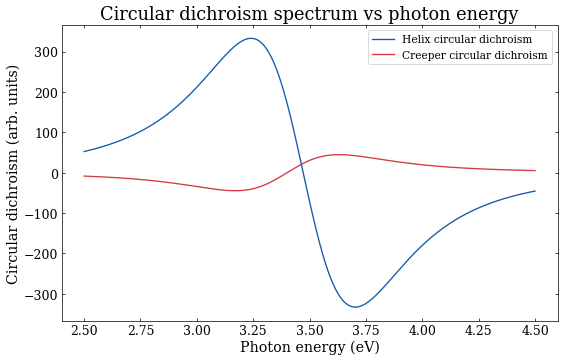

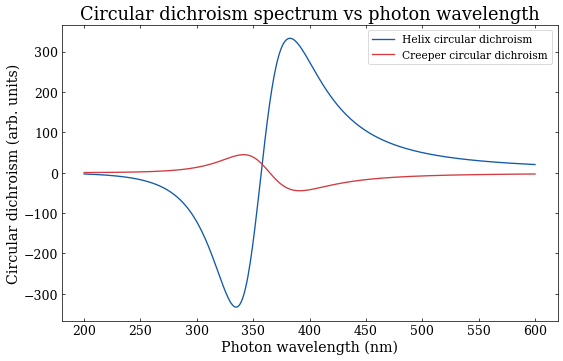

In [3]:
# Circular dichroism versus photon energy
if __name__ == "__main__":
    # Define energy axis (in eV); choose range around hbar_omega0 ~ 3.4 eV
    ω_axis = np.linspace(2.5, 4.5, 400)
    
    # Model parameters
    ħω0 = 3.4       # Resonance energy of a single molecule (eV)
    γ = 0.4         # Linewidth (eV)
    μ0 = 4.0        # Transition dipole moment magnitude (arb. units)
    G = 0.1         # Geometrical factor for coupling (arb. units)
    
    # Helix Geometry
    positions_helix, dipoles_helix = generate_helix_geometry(N=32, dz=7.0, dtheta=30)
    H_helix = construct_hamiltonian(positions_helix, dipoles_helix, ħω0, μ0)
    eigenvals_h, eigenvecs_h = np.linalg.eigh(H_helix)
    _, cd_h = aggregate_spectrum(ω_axis, eigenvals_h, eigenvecs_h, positions_helix, dipoles_helix, μ0, γ)
    
    # Creeper Geometry
    positions_creeper, dipoles_creeper = generate_creeper_geometry(N=32, dz=7.0, dx=5.0, dtheta=30)
    H_creeper = construct_hamiltonian(positions_creeper, dipoles_creeper, ħω0, μ0)
    eigenvals_c, eigenvecs_c = np.linalg.eigh(H_creeper)
    _, cd_c = aggregate_spectrum(ω_axis, eigenvals_c, eigenvecs_c, positions_creeper, dipoles_creeper, μ0, γ)
    
    # Figure settings
    plt.figure(figsize=(10, 6), dpi=64)
    params = {"text.usetex": False, "font.family": "serif", "mathtext.fontset": "cm", 
              "axes.titlesize": 20, "axes.labelsize": 16, "xtick.labelsize": 14, 
              "ytick.labelsize": 14, "legend.fontsize": 12, "figure.facecolor": "w"}
    plt.rcParams.update(params)
    plt.tick_params(direction="in", which="both", top=True, right=True)
    
    # Plot the CD spectra versus photon energy
    plt.plot(ω_axis, cd_h, color="#145AAA", label="Helix circular dichroism")
    plt.plot(ω_axis, cd_c, color="#D23C41", label="Creeper circular dichroism")
    plt.xlabel("Photon energy (eV)")
    plt.ylabel("Circular dichroism (arb. units)")
    plt.title("Circular dichroism spectrum vs photon energy")
    plt.legend()
    plt.show()

# Circular dichroism versus photon wavelength
if __name__ == "__main__":
    # Define wavelength range (in nm)
    λ = np.linspace(200, 600, 400)  # Wavelength array from 200 nm to 600 nm

    # Convert wavelength to photon energy using E (eV) ≈ 1239.841974 / λ (nm)
    ω_axis = 1239.841974 / λ  # Photon energy in eV

    # Model parameters
    ħω0 = 3.4       # Resonance energy of a single molecule (eV)
    γ = 0.4         # Linewidth (eV)
    μ0 = 4.0        # Transition dipole moment magnitude (arb. units)
    G = 0.1         # Geometrical factor for coupling (arb. units)

    # Helix Geometry
    positions_helix, dipoles_helix = generate_helix_geometry(N=32, dz=7.0, dtheta=30)
    H_helix = construct_hamiltonian(positions_helix, dipoles_helix, ħω0, μ0)
    eigenvals_h, eigenvecs_h = np.linalg.eigh(H_helix)
    _, cd_h = aggregate_spectrum(ω_axis, eigenvals_h, eigenvecs_h, positions_helix, dipoles_helix, μ0, γ)

    # Creeper Geometry
    positions_creeper, dipoles_creeper = generate_creeper_geometry(N=32, dz=7.0, dx=5.0, dtheta=30)
    H_creeper = construct_hamiltonian(positions_creeper, dipoles_creeper, ħω0, μ0)
    eigenvals_c, eigenvecs_c = np.linalg.eigh(H_creeper)
    _, cd_c = aggregate_spectrum(ω_axis, eigenvals_c, eigenvecs_c, positions_creeper, dipoles_creeper, μ0, γ)

    # Figure settings
    plt.figure(figsize=(10, 6), dpi=64)
    params = {"text.usetex": False, "font.family": "serif", "mathtext.fontset": "cm",
              "axes.titlesize": 20, "axes.labelsize": 16, "xtick.labelsize": 14,
              "ytick.labelsize": 14, "legend.fontsize": 12, "figure.facecolor": "w"}
    plt.rcParams.update(params)
    plt.tick_params(direction="in", which="both", top=True, right=True)

    # Plot the CD spectra versus photon wavelength (nm)
    plt.plot(λ, cd_h, color="#145AAA", label="Helix circular dichroism")
    plt.plot(λ, cd_c, color="#D23C41", label="Creeper circular dichroism")
    plt.xlabel("Photon wavelength (nm)")
    plt.ylabel("Circular dichroism (arb. units)")
    plt.title("Circular dichroism spectrum vs photon wavelength")
    plt.legend()
    plt.show()
